In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import ta

from startegy001 import Strategy001
from startegy002 import Strategy002
from strategy_bacd import StrategyBacd
from simple import SimpleStrategy
from strategy_macd_cci import StrategyMacdCci
from strategy_bacd_macd import StrategyBacdMacd

In [2]:
SYMBOL = 'ETH'
from_csv = pd.read_csv(f'../../data/{SYMBOL}.csv')
df = from_csv.set_index(pd.DatetimeIndex(from_csv['begins_at'].values))
df = df.rename(columns={"begins_at":"time", "open_price":"open", "close_price":"close", "low_price":"low", "high_price":"high"})
df['average'] = df[['high','low']].mean(axis=1)
df = df.drop(columns=["time"])

In [3]:
#Create a function to signal when to buy and sell an asset
def calculate_when_to_trade(dataframe, strategy):
    sigPriceBuy = []
    sigPriceSell = []
    cycles = []
    bought = False
    for i in range(0,len(dataframe)):
        current_price = dataframe['average'][i]
        if bought == False and strategy.shouldBuy(dataframe, i):
            sigPriceBuy.append(current_price)
            sigPriceSell.append(np.nan)
            bought = i
        elif bought != False and strategy.shouldSell(dataframe, i, bought): 
            sigPriceSell.append(current_price)
            sigPriceBuy.append(np.nan)
            cycles.append(current_price - dataframe['average'][bought] - 2)
            # print(f"Profit: {current_price - dataframe['average'][bought]}")
            bought = False
        else: #Handling nan values
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell, cycles)

def plot(df, sigPriceBuy, sigPriceSell):
    plt.figure(figsize=(20,4.5))
    plt.xticks(rotation=45)
    plt.plot( df['average'],  label='price', linewidth=1, zorder=1)
    plt.scatter(df.index, sigPriceBuy, color = 'green', label='Buy Signal', marker = '^', alpha = 1, s=10, zorder=2)
    plt.scatter(df.index, sigPriceSell, color = 'red', label='Sell Signal', marker = 'v', alpha = 1, s=10, zorder=3)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

generating indicators
Hit trailing stoploss
Hit trailing stoploss
strategy advised sell point
strategy advised sell point
strategy advised sell point
strategy advised sell point
strategy advised sell point
strategy advised sell point
strategy advised sell point
strategy advised sell point
strategy advised sell point
Hit trailing stoploss
strategy advised sell point
strategy advised sell point
strategy advised sell point
strategy advised sell point
Hit trailing stoploss
strategy advised sell point
strategy advised sell point
strategy advised sell point
Hit trailing stoploss
Hit trailing stoploss
strategy advised sell point
Hit trailing stoploss
Hit trailing stoploss
strategy advised sell point
Hit trailing stoploss
Hit trailing stoploss
strategy advised sell point
strategy advised sell point
Hit trailing stoploss
Hit trailing stoploss
Hit trailing stoploss
strategy advised sell point
Hit trailing stoploss
strategy advised sell point
strategy advised sell point
strategy advised sell poin

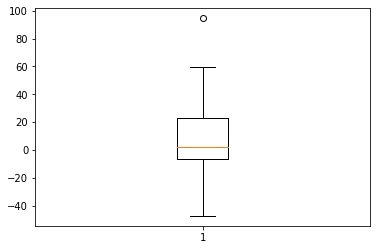

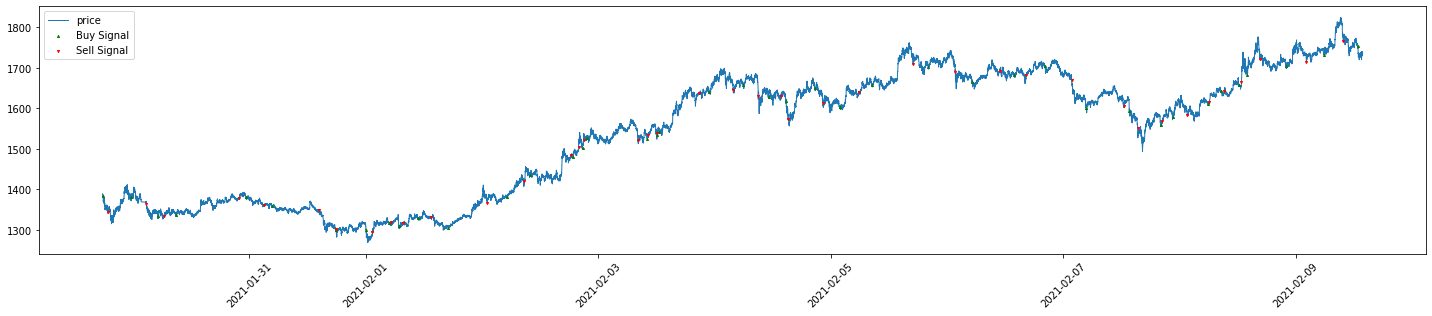

In [4]:
# strat = Strategy002()
# strat = StrategyBacd()
# strat = Strategy001()
# strat = SimpleStrategy()
# strat = StrategyMacdCci()
strat = StrategyBacdMacd()

df = strat.generateIndicators(df)

sigPriceBuy, sigPriceSell, cycles = calculate_when_to_trade(df, strat)

print("Executed buy and sell strategies:")
print(f"Number of cycles: {len(cycles)}")
print(f"Total: ${sum(cycles):.2f}")
if len(cycles):
    print(f"Avg profit/cycle: ${sum(cycles)/len(cycles):.2f}")
print(f"Profit per 15sec: {sum(cycles)/len(df)}")

plt.boxplot(cycles)
plt.show()
plot(df, sigPriceBuy, sigPriceSell)